# backend/train_model.py

In [1]:
import pandas as pd
import numpy as np

# Path ke dataset kamu

In [2]:
DATASET_PATH = "data/heart_disease_uci.csv"

# Memuat dataset

In [3]:
try:
    df = pd.read_csv(DATASET_PATH)
except FileNotFoundError:
    print(f"Error: File dataset tidak ditemukan di {DATASET_PATH}")
    exit()

print("===== 5 Baris Pertama Dataset =====")
print(df.head())

===== 5 Baris Pertama Dataset =====
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  


In [4]:
print("\n===== Informasi Dataset =====")
df.info()



===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
print("\n===== Deskripsi Statistik Dataset =====")
print(df.describe(include='all'))



===== Deskripsi Statistik Dataset =====
                id         age   sex    dataset            cp    trestbps  \
count   920.000000  920.000000   920        920           920  861.000000   
unique         NaN         NaN     2          4             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   726        304           496         NaN   
mean    460.500000   53.510870   NaN        NaN           NaN  132.132404   
std     265.725422    9.424685   NaN        NaN           NaN   19.066070   
min       1.000000   28.000000   NaN        NaN           NaN    0.000000   
25%     230.750000   47.000000   NaN        NaN           NaN  120.000000   
50%     460.500000   54.000000   NaN        NaN           NaN  130.000000   
75%     690.250000   60.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol    fbs restecg 

In [6]:
print("\n===== Jumlah Nilai Kosong per Kolom =====")
print(df.isnull().sum())


===== Jumlah Nilai Kosong per Kolom =====
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [7]:
print("\n===== Jumlah Data Unik per Kolom =====")
for col in df.columns:
    print(f"Kolom '{col}': {df[col].nunique()} nilai unik")


===== Jumlah Data Unik per Kolom =====
Kolom 'id': 920 nilai unik
Kolom 'age': 50 nilai unik
Kolom 'sex': 2 nilai unik
Kolom 'dataset': 4 nilai unik
Kolom 'cp': 4 nilai unik
Kolom 'trestbps': 61 nilai unik
Kolom 'chol': 217 nilai unik
Kolom 'fbs': 2 nilai unik
Kolom 'restecg': 3 nilai unik
Kolom 'thalch': 119 nilai unik
Kolom 'exang': 2 nilai unik
Kolom 'oldpeak': 53 nilai unik
Kolom 'slope': 3 nilai unik
Kolom 'ca': 4 nilai unik
Kolom 'thal': 3 nilai unik
Kolom 'num': 5 nilai unik


# Memuat dataset

In [8]:
try:
    # Saat memuat, kita bisa langsung definisikan nilai '?' sebagai NaN
    df_raw = pd.read_csv(DATASET_PATH, na_values=['?'])
except FileNotFoundError:
    print(f"Error: File dataset tidak ditemukan di {DATASET_PATH}")
    exit()

In [9]:
print("===== Informasi Dataset Setelah na_values='?' =====")
df_raw.info() # Cek ulang Dtype dan Non-Null Count



===== Informasi Dataset Setelah na_values='?' =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
print("\n===== Jumlah Nilai Kosong per Kolom Setelah na_values='?' =====")
print(df_raw.isnull().sum())




===== Jumlah Nilai Kosong per Kolom Setelah na_values='?' =====
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


# 1. Fokus pada dataset 'Cleveland'

In [11]:
print(f"\nDistribusi nilai unik kolom 'dataset' sebelum filter:\n{df_raw['dataset'].value_counts()}")
df = df_raw[df_raw['dataset'] == 'Cleveland'].copy() # .copy() untuk menghindari SettingWithCopyWarning
print(f"\nJumlah data setelah filter 'Cleveland': {len(df)}")



Distribusi nilai unik kolom 'dataset' sebelum filter:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

Jumlah data setelah filter 'Cleveland': 304


# 2. Drop kolom yang tidak relevan
# Kolom 'id' dan 'dataset' (karena sudah difilter) tidak lagi relevan untuk model

In [12]:
columns_to_drop = ['id', 'dataset']
df.drop(columns=columns_to_drop, inplace=True)
print(f"\nKolom setelah drop 'id' dan 'dataset': {df.columns.tolist()}")




Kolom setelah drop 'id' dan 'dataset': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


# 3. Cek ulang missing values setelah filter dan drop

In [13]:
print("\n===== Jumlah Nilai Kosong (Cleveland) Setelah Drop Kolom =====")
print(df.isnull().sum())



===== Jumlah Nilai Kosong (Cleveland) Setelah Drop Kolom =====
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64


# 4. Konversi target 'num' menjadi biner
### 0 = tidak ada penyakit, >0 = ada penyakit (ubah ke 1)

In [14]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True) # Drop kolom 'num' asli
print("\n===== Distribusi Target Setelah Konversi Biner =====")
print(df['target'].value_counts())



===== Distribusi Target Setelah Konversi Biner =====
target
0    165
1    139
Name: count, dtype: int64


# 5. Penanganan Tipe Data yang Seharusnya Numerik tapi Dibaca Object karena '?'
### Kolom 'ca' dan 'thal' sering punya '?' yang membuatnya object.
### read_csv dengan na_values=['?'] sudah harusnya mengubah '?' menjadi NaN,
### dan Pandas akan mencoba infer tipe data. Kita cek lagi.
### Jika 'ca' dan 'thal' masih object, kita perlu konversi manual ke float setelah imputasi.
### Untuk 'fbs' dan 'exang' yang TRUE/FALSE


In [15]:
bool_map = {True: 1, False: 0, np.nan: np.nan} # Mapping untuk True/False ke 1/0, NaN tetap NaN
df['fbs'] = df['fbs'].map(bool_map)
df['exang'] = df['exang'].map(bool_map)

print("\n===== Dtypes setelah konversi boolean (fbs, exang) =====")
print(df.dtypes)


===== Dtypes setelah konversi boolean (fbs, exang) =====
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs         float64
restecg      object
thalch      float64
exang       float64
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object


In [16]:
print("\n===== TAHAP 2: Imputasi Missing Values (Cleveland) =====")


===== TAHAP 2: Imputasi Missing Values (Cleveland) =====


# Cek tipe data sebelum imputasi untuk kolom dengan missing values

In [17]:
print("Dtype 'slope' sebelum imputasi:", df['slope'].dtype)
print("Dtype 'ca' sebelum imputasi:", df['ca'].dtype)
print("Dtype 'thal' sebelum imputasi:", df['thal'].dtype)

Dtype 'slope' sebelum imputasi: object
Dtype 'ca' sebelum imputasi: float64
Dtype 'thal' sebelum imputasi: object


### Imputasi dengan modus untuk 'slope', 'ca', dan 'thal' karena jumlah missing sedikit
### dan 'ca' serta 'thal' bisa dianggap kategorikal/diskrit

In [18]:
for col in ['slope', 'ca', 'thal']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # Ambil modus pertama jika ada lebih dari satu
        df[col] = df[col].fillna(mode_val)
        print(f"Kolom '{col}' diimputasi dengan modus: {mode_val}")

print("\n===== Jumlah Nilai Kosong Setelah Imputasi (Cleveland) =====")
print(df.isnull().sum())

Kolom 'slope' diimputasi dengan modus: upsloping
Kolom 'ca' diimputasi dengan modus: 0.0
Kolom 'thal' diimputasi dengan modus: normal

===== Jumlah Nilai Kosong Setelah Imputasi (Cleveland) =====
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [19]:
print("\n===== TAHAP 3: Encoding Fitur Kategorikal (Cleveland) =====")


===== TAHAP 3: Encoding Fitur Kategorikal (Cleveland) =====


### Kolom yang perlu di-encode: sex, cp, restecg, slope, thal
### fbs dan exang sudah 0/1

### Encoding 'sex' secara manual (Male: 1, Female: 0)

In [20]:
sex_map = {'Male': 1, 'Female': 0}
df['sex'] = df['sex'].map(sex_map)
print("\nKolom 'sex' setelah encoding:")
print(df['sex'].value_counts())


Kolom 'sex' setelah encoding:
sex
1    207
0     97
Name: count, dtype: int64


# Encoding kolom kategorikal lainnya menggunakan pd.get_dummies()
# Ini akan membuat kolom baru untuk setiap kategori unik dan drop kolom asli

In [21]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# drop_first=True untuk menghindari multikolinearitas, 
# satu kategori bisa direpresentasikan dengan ketiadaan kategori lain.

In [22]:
print("\n===== 5 Baris Pertama Setelah Encoding Kategorikal =====")
print(df.head())
print("\n===== Kolom Setelah Encoding =====")
print(df.columns.tolist())
print("\n===== Informasi Dataset Setelah Encoding =====")
df.info()


===== 5 Baris Pertama Setelah Encoding Kategorikal =====
   age  sex  trestbps   chol  fbs  thalch  exang  oldpeak   ca  target  \
0   63    1     145.0  233.0  1.0   150.0    0.0      2.3  0.0       0   
1   67    1     160.0  286.0  0.0   108.0    1.0      1.5  3.0       1   
2   67    1     120.0  229.0  0.0   129.0    1.0      2.6  2.0       1   
3   37    1     130.0  250.0  0.0   187.0    0.0      3.5  0.0       0   
4   41    0     130.0  204.0  0.0   172.0    0.0      1.4  0.0       0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  slope_flat 

### =========================================================

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle # Untuk menyimpan objek scaler
import os

print("\n===== TAHAP 4: Pemisahan Fitur dan Target, Pembagian Data =====")


===== TAHAP 4: Pemisahan Fitur dan Target, Pembagian Data =====


In [24]:
print("\n===== TAHAP 4: Pemisahan Fitur dan Target, Pembagian Data =====")

# 1. Pisahkan Fitur (X) dan Target (y)
X = df.drop(columns=['target'])
y = df['target']

print("Shape X (fitur):", X.shape)
print("Shape y (target):", y.shape)

# 2. Pembagian Data menjadi Training dan Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)
print("\nDistribusi target di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target di y_test:")
print(y_test.value_counts(normalize=True))




===== TAHAP 4: Pemisahan Fitur dan Target, Pembagian Data =====
Shape X (fitur): (304, 18)
Shape y (target): (304,)

Shape X_train: (243, 18)
Shape X_test: (61, 18)
Shape y_train: (243,)
Shape y_test: (61,)

Distribusi target di y_train:
target
0    0.54321
1    0.45679
Name: proportion, dtype: float64

Distribusi target di y_test:
target
0    0.540984
1    0.459016
Name: proportion, dtype: float64


In [25]:
print("\n===== TAHAP 5: Feature Scaling =====")
numeric_cols = X_train.columns
scaler = StandardScaler()

# Fit scaler HANYA pada X_train dan transform X_train
X_train_scaled_np = scaler.fit_transform(X_train[numeric_cols]) # Hasilnya array NumPy

# Transform X_test menggunakan scaler yang sudah di-fit pada X_train
X_test_scaled_np = scaler.transform(X_test[numeric_cols]) # Hasilnya array NumPy

# Konversi kembali ke DataFrame
# Menggunakan nama variabel yang berbeda untuk hasil array NumPy agar tidak bingung
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=numeric_cols, index=X_test.index) # PERBAIKAN DI SINI

print("\n===== 5 Baris Pertama X_train Setelah Scaling =====")
print(X_train_scaled.head())
print("\n===== Deskripsi Statistik X_train Setelah Scaling (Mean & Std) =====")
print(X_train_scaled.describe().loc[['mean', 'std']])

# 3. Simpan Objek Scaler
MODELS_DIR = "models"
SCALER_PATH = f"{MODELS_DIR}/heart_disease_scaler.pkl"

if not os.path.exists(MODELS_DIR):
    os.makedirs(MODELS_DIR)

with open(SCALER_PATH, 'wb') as f:
    pickle.dump(scaler, f)
print(f"\nObjek Scaler disimpan di: {SCALER_PATH}")



===== TAHAP 5: Feature Scaling =====

===== 5 Baris Pertama X_train Setelah Scaling =====
          age       sex  trestbps      chol       fbs    thalch     exang  \
68   0.509621  0.687552  2.220951  1.436115 -0.417029 -0.434612  1.440816   
208  0.064161  0.687552 -0.061765  0.218713 -0.417029  0.225180 -0.694051   
167 -0.047204 -1.454436  0.052371  0.713282  2.397916  0.401125  1.440816   
105 -0.047204  0.687552 -1.317259  1.112742 -0.417029  0.269166 -0.694051   
189  1.623272  0.687552  0.508914  0.066538 -0.417029 -0.170695 -0.694051   

      oldpeak        ca  cp_atypical angina  cp_non-anginal  \
68   2.149656 -0.687622           -0.457116       -0.616994   
208 -0.886320 -0.687622            2.187628       -0.616994   
167 -0.886320  0.449059            2.187628       -0.616994   
105 -0.886320 -0.687622            2.187628       -0.616994   
189  0.899548  2.722422           -0.457116        1.620761   

     cp_typical angina  restecg_normal  restecg_st-t abnormality  s

### =========================================================

In [26]:
# Penanganan untuk Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name=""):
    """
    Fungsi ini akan membuat dan menampilkan visualisasi confusion matrix.
    """
    # Hitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Label untuk kelas (0: No Disease, 1: Disease)
    class_labels = ['No Disease', 'Disease']
    
    plt.figure(figsize=(8, 6))
    
    # Buat heatmap menggunakan Seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels)
    
    # Tambahkan judul dan label
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [28]:
# Pastikan semua library yang dibutuhkan sudah di-import di bagian atas skrip Anda
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # <-- Tambahan untuk Support Vector Classifier
from xgboost import XGBClassifier # <-- Tambahan untuk XGBoost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
# import pickle # <-- Pastikan pickle sudah di-import
# MODELS_DIR = 'models' # <-- Pastikan variabel ini sudah didefinisikan

print("\n===== TAHAP 6: Pelatihan dan Evaluasi Model Dasar =====")



===== TAHAP 6: Pelatihan dan Evaluasi Model Dasar =====



--- Model: Logistic Regression ---
Akurasi Logistic Regression: 0.8688524590163934
Presisi Logistic Regression: 0.8333333333333334
Recall Logistic Regression: 0.8928571428571429
F1-Score Logistic Regression: 0.8620689655172413
ROC-AUC Logistic Regression: 0.9437229437229437
Confusion Matrix Logistic Regression:
 [[28  5]
 [ 3 25]]
Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



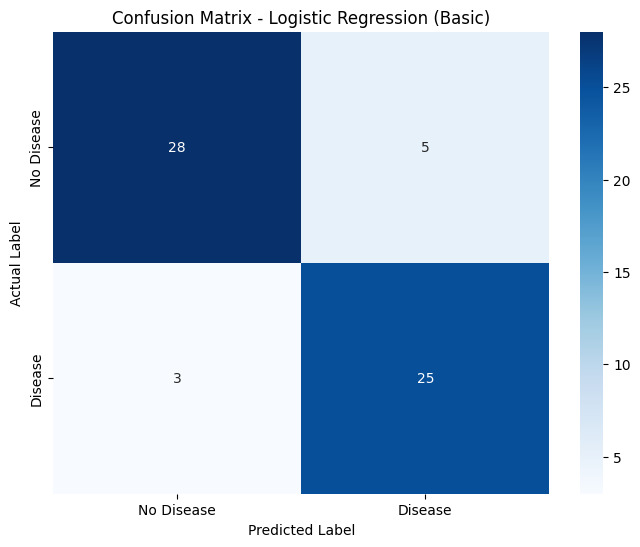

Model Logistic Regression disimpan di: models/lr_model_basic.pkl


In [29]:
# --- 1. Logistic Regression ---
print("\n--- Model: Logistic Regression ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Prediksi pada test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Presisi Logistic Regression:", precision_score(y_test, y_pred_lr))
print("Recall Logistic Regression:", recall_score(y_test, y_pred_lr))
print("F1-Score Logistic Regression:", f1_score(y_test, y_pred_lr))
print("ROC-AUC Logistic Regression:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, model_name="Logistic Regression (Basic)") 

# Simpan model Logistic Regression
LR_MODEL_PATH = f"{MODELS_DIR}/lr_model_basic.pkl"
with open(LR_MODEL_PATH, 'wb') as f:
    pickle.dump(lr_model, f)
print(f"Model Logistic Regression disimpan di: {LR_MODEL_PATH}")



--- Model: Random Forest Classifier ---
Akurasi Random Forest: 0.8688524590163934
Presisi Random Forest: 0.8333333333333334
Recall Random Forest: 0.8928571428571429
F1-Score Random Forest: 0.8620689655172413
ROC-AUC Random Forest: 0.9442640692640694
Confusion Matrix Random Forest:
 [[28  5]
 [ 3 25]]
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



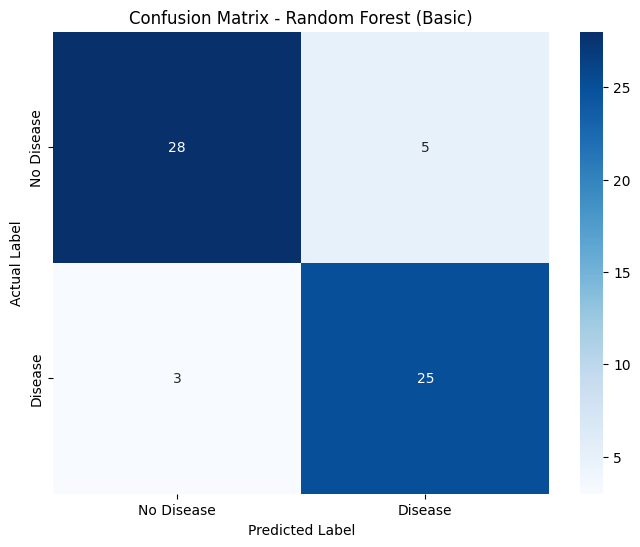

Model Random Forest disimpan di: models/rf_model_basic.pkl


In [30]:
# --- 2. Random Forest Classifier ---
print("\n--- Model: Random Forest Classifier ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Prediksi pada test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Presisi Random Forest:", precision_score(y_test, y_pred_rf))
print("Recall Random Forest:", recall_score(y_test, y_pred_rf))
print("F1-Score Random Forest:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Random Forest:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, model_name="Random Forest (Basic)")

# Simpan model Random Forest
RF_MODEL_PATH = f"{MODELS_DIR}/rf_model_basic.pkl"
with open(RF_MODEL_PATH, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"Model Random Forest disimpan di: {RF_MODEL_PATH}")



--- Model: Support Vector Classifier (SVC) ---
Akurasi SVC: 0.819672131147541
Presisi SVC: 0.8148148148148148
Recall SVC: 0.7857142857142857
F1-Score SVC: 0.8
ROC-AUC SVC: 0.9231601731601731
Confusion Matrix SVC:
 [[28  5]
 [ 6 22]]
Classification Report SVC:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



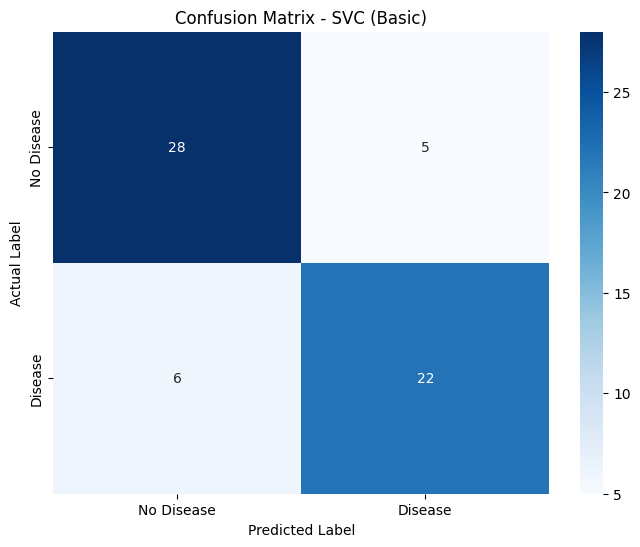

Model SVC disimpan di: models/svc_model_basic.pkl


In [31]:
# --- 3. Support Vector Classifier (SVC) --- (BARU)
print("\n--- Model: Support Vector Classifier (SVC) ---")
# probability=True diperlukan untuk menghitung ROC-AUC score
svc_model = SVC(random_state=42, probability=True) 
svc_model.fit(X_train_scaled, y_train)

# Prediksi pada test set
y_pred_svc = svc_model.predict(X_test_scaled)
y_prob_svc = svc_model.predict_proba(X_test_scaled)[:, 1] # Probabilitas untuk kelas positif (1)

# Evaluasi
print("Akurasi SVC:", accuracy_score(y_test, y_pred_svc))
print("Presisi SVC:", precision_score(y_test, y_pred_svc))
print("Recall SVC:", recall_score(y_test, y_pred_svc))
print("F1-Score SVC:", f1_score(y_test, y_pred_svc))
print("ROC-AUC SVC:", roc_auc_score(y_test, y_prob_svc))
print("Confusion Matrix SVC:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report SVC:\n", classification_report(y_test, y_pred_svc))
plot_confusion_matrix(y_test, y_pred_svc, model_name="SVC (Basic)")


# Simpan model SVC
SVC_MODEL_PATH = f"{MODELS_DIR}/svc_model_basic.pkl"
with open(SVC_MODEL_PATH, 'wb') as f:
    pickle.dump(svc_model, f)
print(f"Model SVC disimpan di: {SVC_MODEL_PATH}")



--- Model: XGBoost Classifier ---
Akurasi XGBoost: 0.8524590163934426
Presisi XGBoost: 0.7878787878787878
Recall XGBoost: 0.9285714285714286
F1-Score XGBoost: 0.8524590163934426
ROC-AUC XGBoost: 0.9372294372294372
Confusion Matrix XGBoost:
 [[26  7]
 [ 2 26]]
Classification Report XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



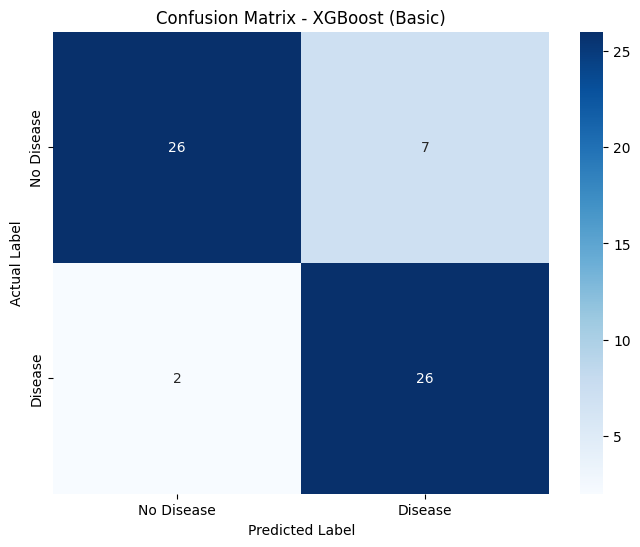

Model XGBoost disimpan di: models/xgb_model_basic.pkl


In [32]:
# --- 4. XGBoost Classifier --- (BARU)
print("\n--- Model: XGBoost Classifier ---")
# eval_metric='logloss' adalah metrik evaluasi yang umum untuk klasifikasi biner
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss') # <-- Hapus use_label_encoder=False
xgb_model.fit(X_train_scaled, y_train)

# Prediksi pada test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1] # Probabilitas untuk kelas positif (1)

# Evaluasi
print("Akurasi XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Presisi XGBoost:", precision_score(y_test, y_pred_xgb))
print("Recall XGBoost:", recall_score(y_test, y_pred_xgb))
print("F1-Score XGBoost:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC XGBoost:", roc_auc_score(y_test, y_prob_xgb))
print("Confusion Matrix XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report XGBoost:\n", classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, model_name="XGBoost (Basic)")


# Simpan model XGBoost
XGB_MODEL_PATH = f"{MODELS_DIR}/xgb_model_basic.pkl"
with open(XGB_MODEL_PATH, 'wb') as f:
    pickle.dump(xgb_model, f)
print(f"Model XGBoost disimpan di: {XGB_MODEL_PATH}")

### =========================================================


===== TAHAP 7: Optimasi Hyperparameter =====

--- Optimasi: Logistic Regression ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Parameter terbaik untuk Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Skor ROC-AUC terbaik (cross-val): 0.9020365302973998

--- Hasil Logistic Regression Setelah Optimasi ---
ROC-AUC: 0.9512987012987013
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



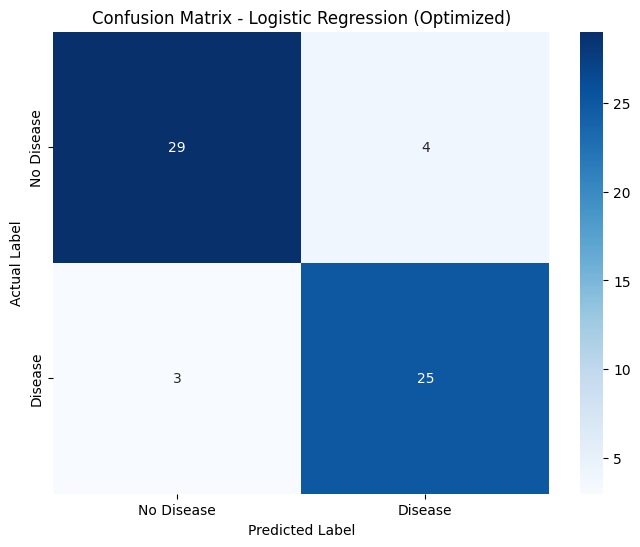

Model Logistic Regression (Optimized) disimpan di: models/lr_model_optimized.pkl

--- Optimasi: Random Forest Classifier ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Parameter terbaik untuk Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Skor ROC-AUC terbaik (cross-val): 0.8990253707645012

--- Hasil Random Forest Setelah Optimasi ---
ROC-AUC: 0.9383116883116883
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



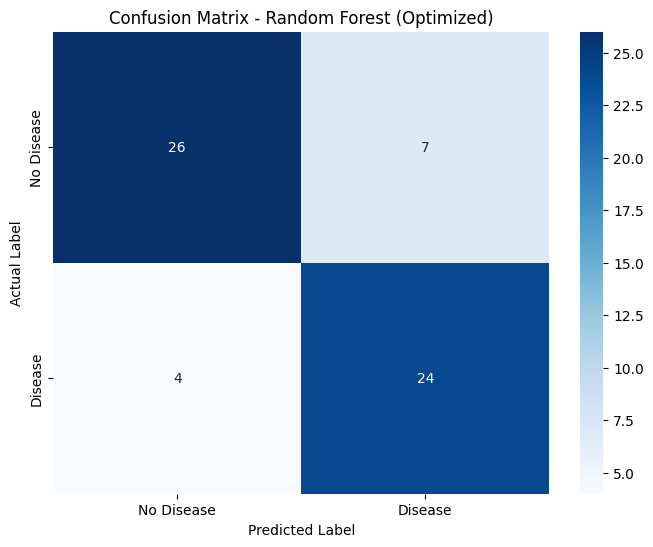

Model Random Forest (Optimized) disimpan di: models/rf_model_optimized.pkl

--- Optimasi: Support Vector Classifier (SVC) ---
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Parameter terbaik untuk SVC: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Skor ROC-AUC terbaik (cross-val): 0.8959905633818677

--- Hasil SVC Setelah Optimasi ---
ROC-AUC: 0.9361471861471861
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.91      0.71      0.80        28

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



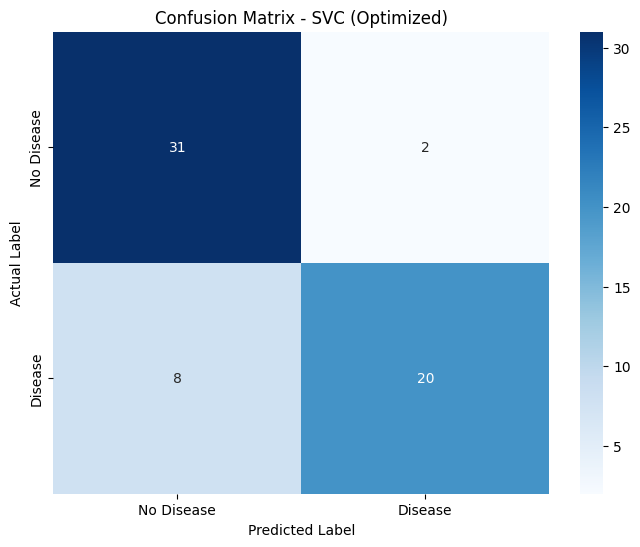

Model SVC (Optimized) disimpan di: models/svc_model_optimized.pkl

--- Optimasi: XGBoost Classifier ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameter terbaik untuk XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Skor ROC-AUC terbaik (cross-val): 0.8972731777079603

--- Hasil XGBoost Setelah Optimasi ---
ROC-AUC: 0.9534632034632036
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



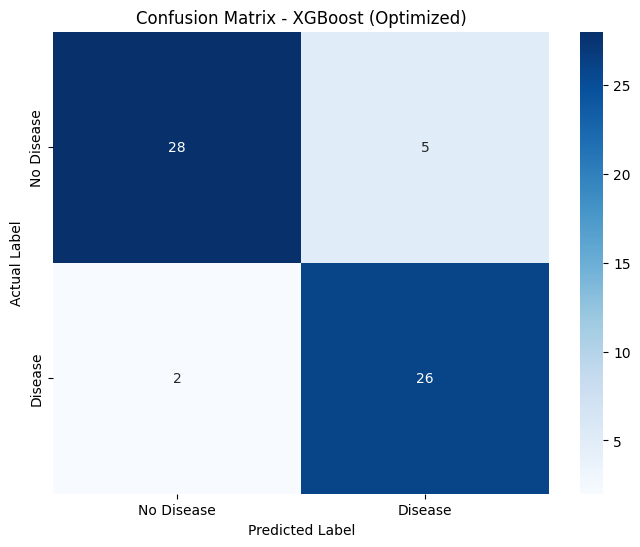

Model XGBoost (Optimized) disimpan di: models/xgb_model_optimized.pkl

===== Pelatihan dan Optimasi Selesai =====


In [33]:
from sklearn.model_selection import GridSearchCV

print("\n===== TAHAP 7: Optimasi Hyperparameter =====")

# --- 1. Optimasi Hyperparameter untuk Logistic Regression ---
print("\n--- Optimasi: Logistic Regression ---")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000),
                       param_grid_lr, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
best_lr_model = grid_lr.best_estimator_

print("Parameter terbaik untuk Logistic Regression:", grid_lr.best_params_)
print("Skor ROC-AUC terbaik (cross-val):", grid_lr.best_score_)

# Evaluasi pada test set
y_pred_lr_optimized = best_lr_model.predict(X_test_scaled)
y_prob_lr_optimized = best_lr_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Hasil Logistic Regression Setelah Optimasi ---")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr_optimized))
print(classification_report(y_test, y_pred_lr_optimized))
plot_confusion_matrix(y_test, y_pred_lr_optimized, model_name="Logistic Regression (Optimized)")

LR_OPTIMIZED_MODEL_PATH = f"{MODELS_DIR}/lr_model_optimized.pkl"
with open(LR_OPTIMIZED_MODEL_PATH, 'wb') as f:
    pickle.dump(best_lr_model, f)
print(f"Model Logistic Regression (Optimized) disimpan di: {LR_OPTIMIZED_MODEL_PATH}")

# --- 2. Optimasi Hyperparameter untuk Random Forest ---
print("\n--- Optimasi: Random Forest Classifier ---")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf_model = grid_rf.best_estimator_

print("Parameter terbaik untuk Random Forest:", grid_rf.best_params_)
print("Skor ROC-AUC terbaik (cross-val):", grid_rf.best_score_)

# Evaluasi pada test set
y_pred_rf_optimized = best_rf_model.predict(X_test_scaled)
y_prob_rf_optimized = best_rf_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Hasil Random Forest Setelah Optimasi ---")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_optimized))
print(classification_report(y_test, y_pred_rf_optimized))
plot_confusion_matrix(y_test, y_pred_rf_optimized, model_name="Random Forest (Optimized)")

RF_OPTIMIZED_MODEL_PATH = f"{MODELS_DIR}/rf_model_optimized.pkl"
with open(RF_OPTIMIZED_MODEL_PATH, 'wb') as f:
    pickle.dump(best_rf_model, f)
print(f"Model Random Forest (Optimized) disimpan di: {RF_OPTIMIZED_MODEL_PATH}")

# --- 3. Optimasi Hyperparameter untuk SVC --- (BARU)
print("\n--- Optimasi: Support Vector Classifier (SVC) ---")
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(SVC(random_state=42, probability=True),
                        param_grid_svc, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_svc.fit(X_train_scaled, y_train)
best_svc_model = grid_svc.best_estimator_

print("Parameter terbaik untuk SVC:", grid_svc.best_params_)
print("Skor ROC-AUC terbaik (cross-val):", grid_svc.best_score_)

# Evaluasi pada test set
y_pred_svc_optimized = best_svc_model.predict(X_test_scaled)
y_prob_svc_optimized = best_svc_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Hasil SVC Setelah Optimasi ---")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svc_optimized))
print(classification_report(y_test, y_pred_svc_optimized))
plot_confusion_matrix(y_test, y_pred_svc_optimized, model_name="SVC (Optimized)")

SVC_OPTIMIZED_MODEL_PATH = f"{MODELS_DIR}/svc_model_optimized.pkl"
with open(SVC_OPTIMIZED_MODEL_PATH, 'wb') as f:
    pickle.dump(best_svc_model, f)
print(f"Model SVC (Optimized) disimpan di: {SVC_OPTIMIZED_MODEL_PATH}")

# --- 4. Optimasi Hyperparameter untuk XGBoost --- (BARU)
print("\n--- Optimasi: XGBoost Classifier ---")
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                        param_grid_xgb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
best_xgb_model = grid_xgb.best_estimator_

print("Parameter terbaik untuk XGBoost:", grid_xgb.best_params_)
print("Skor ROC-AUC terbaik (cross-val):", grid_xgb.best_score_)

# Evaluasi pada test set
y_pred_xgb_optimized = best_xgb_model.predict(X_test_scaled)
y_prob_xgb_optimized = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Hasil XGBoost Setelah Optimasi ---")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb_optimized))
print(classification_report(y_test, y_pred_xgb_optimized))
plot_confusion_matrix(y_test, y_pred_xgb_optimized, model_name="XGBoost (Optimized)")

XGB_OPTIMIZED_MODEL_PATH = f"{MODELS_DIR}/xgb_model_optimized.pkl"
with open(XGB_OPTIMIZED_MODEL_PATH, 'wb') as f:
    pickle.dump(best_xgb_model, f)
print(f"Model XGBoost (Optimized) disimpan di: {XGB_OPTIMIZED_MODEL_PATH}")

print("\n===== Pelatihan dan Optimasi Selesai =====")


### TAHAP 8: PERBANDINGAN AKHIR SEMUA MODEL & SIMPAN HASIL


===== TAHAP 8: Membuat Grafik Perbandingan Kinerja Model =====

--- Tabel Skor Perbandingan Model ---
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.885246   0.862069  0.892857  0.877193  0.951299
1        Random Forest  0.819672   0.774194  0.857143  0.813559  0.938312
2                  SVC  0.836066   0.909091  0.714286  0.800000  0.936147
3              XGBoost  0.885246   0.838710  0.928571  0.881356  0.953463

Grafik perbandingan berhasil disimpan di: hasil\grafik_perbandingan_model_non_pca.png
Tabel skor perbandingan berhasil disimpan di: hasil\tabel_skor_model_non_pca.csv


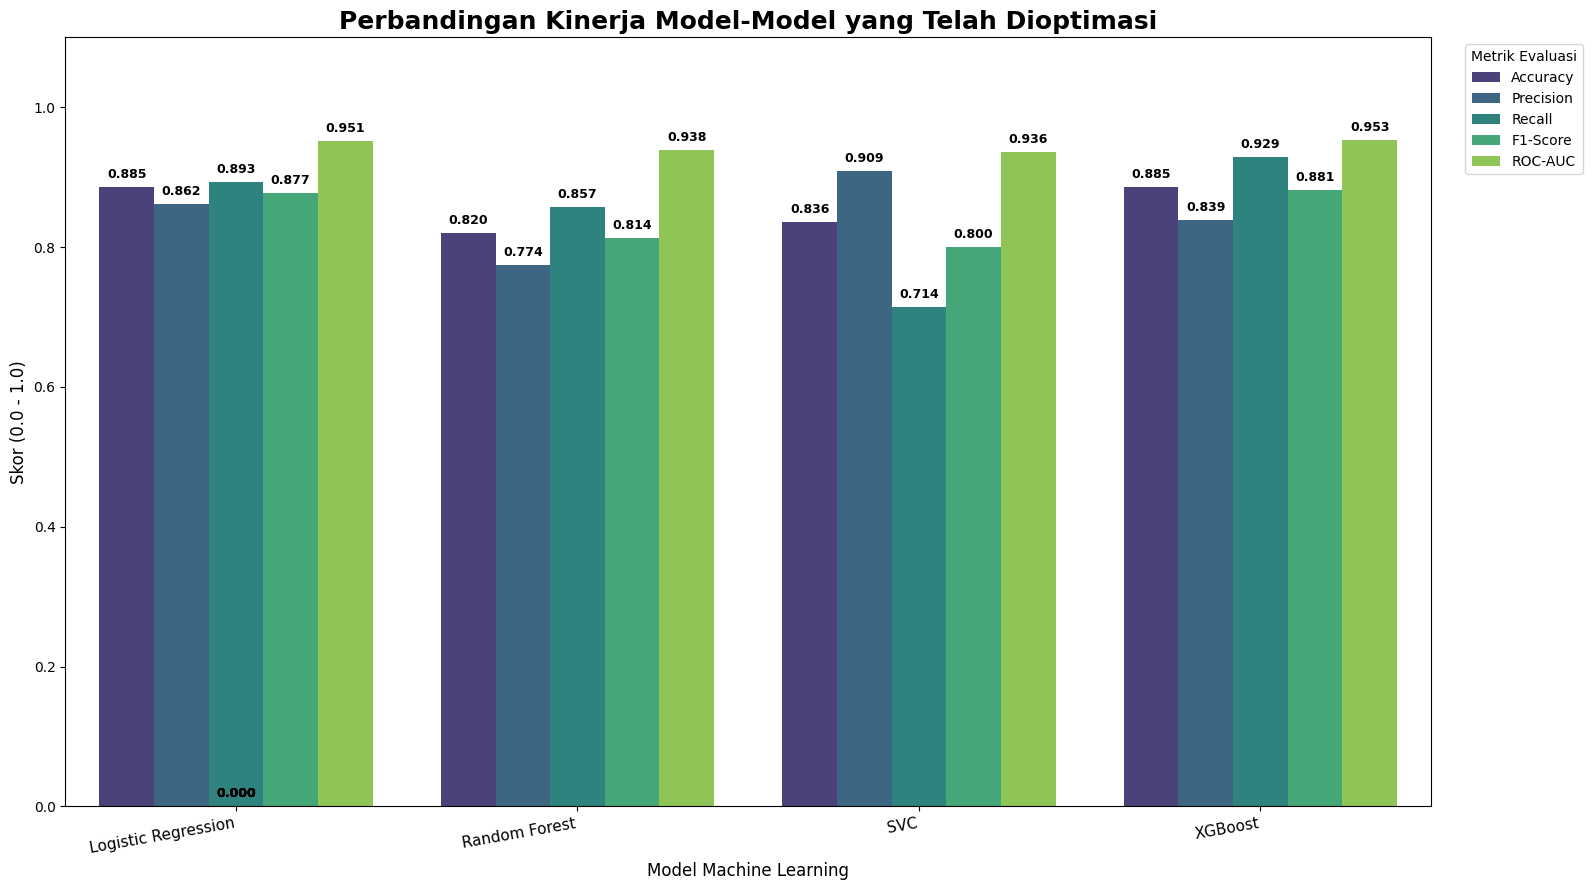

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n===== TAHAP 8: Membuat Grafik Perbandingan Kinerja Model =====")

# 1. Kumpulkan semua skor dari model-model yang sudah dioptimasi
model_performance = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'SVC',
        'XGBoost'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_optimized),
        accuracy_score(y_test, y_pred_rf_optimized),
        accuracy_score(y_test, y_pred_svc_optimized),
        accuracy_score(y_test, y_pred_xgb_optimized)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_optimized),
        precision_score(y_test, y_pred_rf_optimized),
        precision_score(y_test, y_pred_svc_optimized),
        precision_score(y_test, y_pred_xgb_optimized)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_optimized),
        recall_score(y_test, y_pred_rf_optimized),
        recall_score(y_test, y_pred_svc_optimized),
        recall_score(y_test, y_pred_xgb_optimized)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_optimized),
        f1_score(y_test, y_pred_rf_optimized),
        f1_score(y_test, y_pred_svc_optimized),
        f1_score(y_test, y_pred_xgb_optimized)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr_optimized),
        roc_auc_score(y_test, y_prob_rf_optimized),
        roc_auc_score(y_test, y_prob_svc_optimized),
        roc_auc_score(y_test, y_prob_xgb_optimized)
    ]
}

# 2. Buat DataFrame dari dictionary di atas
df_performance = pd.DataFrame(model_performance)

print("\n--- Tabel Skor Perbandingan Model ---")
print(df_performance)

# 3. Siapkan data untuk plotting dengan Seaborn (mengubah dari format 'wide' ke 'long')
df_melted = df_performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

# 4. Buat dan Kustomisasi Plot
plt.figure(figsize=(16, 9)) # Ukuran plot yang lebih besar agar mudah dibaca
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')

plt.title('Perbandingan Kinerja Model-Model yang Telah Dioptimasi', fontsize=18, weight='bold')
plt.ylabel('Skor (0.0 - 1.0)', fontsize=12)
plt.xlabel('Model Machine Learning', fontsize=12)
plt.xticks(rotation=10, ha='right', fontsize=11) # Rotasi sedikit agar tidak tumpang tindih
plt.ylim(0, 1.1) # Beri sedikit ruang di atas bar tertinggi
plt.legend(title='Metrik Evaluasi', bbox_to_anchor=(1.02, 1), loc='upper left') # Pindah legenda ke luar plot

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),      # Format angka 3 desimal
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=9,
                weight='bold')

plt.tight_layout() # Merapikan layout secara otomatis

# 5. Simpan hasil plot dan tabel ke folder 'hasil'
OUTPUT_DIR = 'hasil'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Simpan plot sebagai file gambar
PLOT_PATH = os.path.join(OUTPUT_DIR, 'grafik_perbandingan_model_non_pca.png')
plt.savefig(PLOT_PATH, dpi=300) # dpi=300 untuk kualitas gambar yang lebih tinggi

# Simpan DataFrame sebagai file CSV
CSV_PATH = os.path.join(OUTPUT_DIR, 'tabel_skor_model_non_pca.csv')
df_performance.to_csv(CSV_PATH, index=False)

print(f"\nGrafik perbandingan berhasil disimpan di: {PLOT_PATH}")
print(f"Tabel skor perbandingan berhasil disimpan di: {CSV_PATH}")

# Tampilkan plot di notebook
plt.show()